## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID',how='left')

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Mean tumor volume for each drug regimen
mean_df = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

#Median tumor volume for each drug regimen
median_df = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
                                              
#The variance of the tumor volume for each drug regimen
variance_df = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
                                              
#The standard deviation of the tumor volume for each drug regimen
standard_deviation_df = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
                                              
#The SEM of the tumor volume for each drug regimen
sem_df = merged_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
                                              
#Summary statistics table 
Summary_Table_df = pd.DataFrame({"Mean": mean_df, "Median": median_df, "Variance": variance_df, "Standard Deviation": standard_deviation_df, "SEM": sem_df})

#Formatting
Summary_Table_df ["Mean"] = Summary_Table_df["Mean"].map("{:.3f}".format)
Summary_Table_df ["Median"] = Summary_Table_df["Median"].map("{:.3f}".format)
Summary_Table_df ["Variance"] = Summary_Table_df["Variance"].map("{:.3f}".format)
Summary_Table_df ["Standard Deviation"] = Summary_Table_df["Standard Deviation"].map("{:.3f}".format)
Summary_Table_df ["SEM"] = Summary_Table_df["SEM"].map("{:.3f}".format)

Summary_Table_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

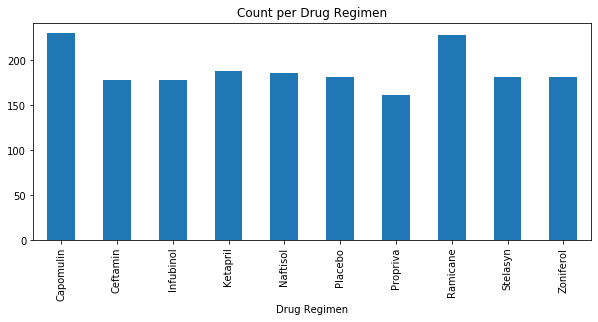

In [12]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_count_df = merged_df.groupby("Drug Regimen")["Mouse ID"].count()

regimen_count_df.plot(kind="bar", figsize=(10,4))
plt.title("Count per Drug Regimen")

plt.show()

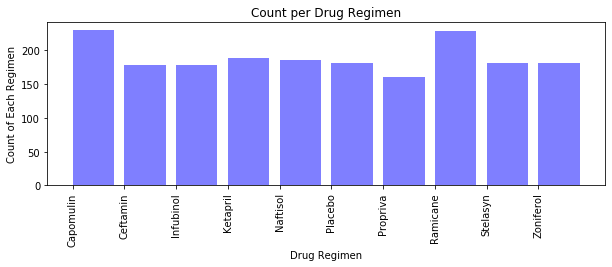

In [13]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(regimen_count_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,3))
plt.bar(x_axis, grouped_df, color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
plt.title("Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Each Regimen")
plt.show()

## Pie plots

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Count of each gender of mouse
gender_count_df = merged_df.groupby("Sex")
each_gender_count_df = gender_count_df["Mouse ID"].nunique() 

#Summary Table
Gender_Analysis_df = pd.DataFrame({"Total Count": each_gender_count_df})
Gender_Analysis_df

,Total Count
Sex,
Female,124
Male,125


(-1.1087936370862872,
 1.1187480755433892,
 -1.1199395799512024,
 1.1085163149757233)

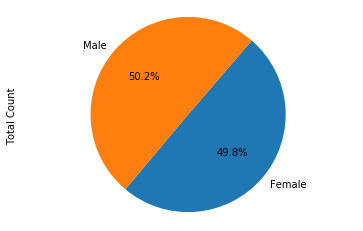

In [6]:
#Pie plot using pandas
plot = Gender_Analysis_df.plot(kind = "pie", y = "Total Count", autopct='%1.1f%%', startangle = 230, legend = False)
plt.axis("equal")

/Users/settenson23/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


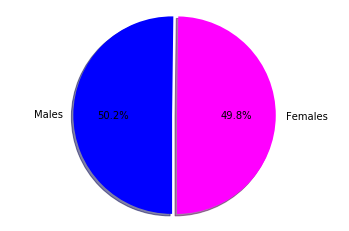

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Females", "Males"]
colors = ["magenta", "blue"]
explode = (0.05, 0)
plt.pie(Gender_Analysis_df, explode = explode, labels = genders, colors = colors, autopct="%1.1f%%", shadow = True, startangle = 270)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Choosing which four to use by the lowest amount of variance in the tumor volume
Summary_Table_df = Summary_Table_df.sort_values(["Variance"], ascending=True)
Summary_Table_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.217,40.673,23.487,4.846,0.321
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Propriva,52.323,50.855,42.351,6.508,0.513
Infubinol,52.885,51.821,43.129,6.567,0.492
Zoniferol,53.237,51.818,48.533,6.967,0.516
Stelasyn,54.233,52.432,59.451,7.710,0.573
Placebo,54.034,52.289,61.168,7.821,0.581
Naftisol,54.332,52.509,66.173,8.135,0.596


In [9]:
# Calculate the final tumor volume of each mouse for the Ramicane Regimen
ramicane_df = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]
ramicane_sorted_df = ramicane_df.sort_values(["Mouse ID", "Timepoint"], ascending=True)
max_ramicane_df = ramicane_sorted_df.loc[ramicane_sorted_df["Timepoint"] == 45]
max_ramicane_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
214,a520,Ramicane,Male,13,21,45,38.810366,1
174,a644,Ramicane,Female,7,17,45,32.978522,1
154,c758,Ramicane,Male,9,17,45,33.397653,1


In [10]:
#Calculate the IQR and quantitatively determine if there are any potential outliers in the Ramicane Regimen
quartiles = max_ramicane_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The median occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 30.981175224999998
The upper quartile of occupancy is: 38.508305307499995
The interquartile range of occupancy is: 7.527130082499998
The median occupancy is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


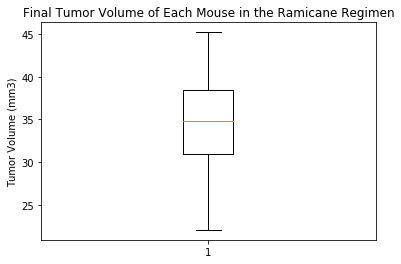

In [11]:
# Generate a box plot of the final tumor volume for the Ramicane Regimen
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse in the Ramicane Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(max_ramicane_df["Tumor Volume (mm3)"])
plt.show()

In [12]:
# Calculate the final tumor volume of each mouse for the Capomulin Regimen
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulin_sorted_df = capomulin_df.sort_values(["Mouse ID", "Timepoint"], ascending=True)
capomulin_max_df = capomulin_sorted_df.loc[capomulin_sorted_df["Timepoint"] == 45]
capomulin_max_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1


In [13]:
#Calculate the IQR and quantitatively determine if there are any potential outliers in the Capomulin Regimen
quartiles = capomulin_max_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The median occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 32.37735684
The upper quartile of occupancy is: 40.1592203
The interquartile range of occupancy is: 7.781863460000004
The median occupancy is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


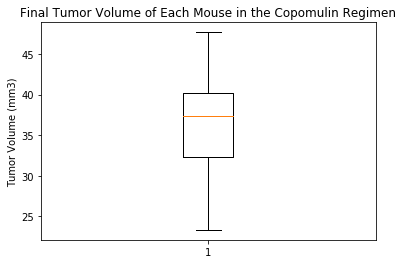

In [14]:
# Generate a box plot of the final tumor volume for the Capomulin Regimen
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse in the Copomulin Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(capomulin_max_df["Tumor Volume (mm3)"])
plt.show()

In [15]:
# Calculate the final tumor volume of each mouse for the Ceftamin Regimen
ceftamin_df = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]
ceftamin_sorted_df = ceftamin_df.sort_values(["Mouse ID", "Timepoint"], ascending=True)
ceftamin_max_df = ceftamin_sorted_df.loc[ceftamin_sorted_df["Timepoint"] == 45]
ceftamin_max_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3


In [16]:
#Calculate the IQR and quantitatively determine if there are any potential outliers in the Ceftamin Regimen
quartiles = ceftamin_max_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The median occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 61.43389223
The upper quartile of occupancy is: 67.52748237
The interquartile range of occupancy is: 6.093590140000003
The median occupancy is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


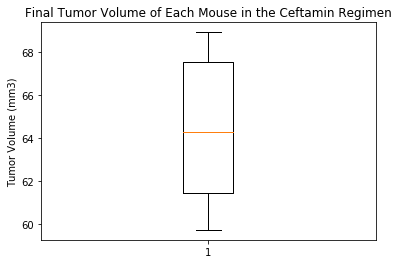

In [17]:
# Generate a box plot of the final tumor volume for the Ceftamin Regimen
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse in the Ceftamin Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(ceftamin_max_df["Tumor Volume (mm3)"])
plt.show()

In [18]:
# Calculate the final tumor volume of each mouse for the Propriva Regimen
propriva_df = merged_df.loc[merged_df["Drug Regimen"] == "Propriva"]
propriva_sorted_df = propriva_df.sort_values(["Mouse ID", "Timepoint"], ascending=True)
propriva_max_df = propriva_sorted_df.loc[propriva_sorted_df["Timepoint"] == 45]
propriva_max_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
550,a699,Propriva,Female,5,28,45,62.191414,1
903,g570,Propriva,Male,16,29,45,70.492788,2
962,i635,Propriva,Male,21,26,45,58.633404,3
1290,o562,Propriva,Female,4,25,45,72.455421,2
1540,t198,Propriva,Male,22,26,45,64.911363,4


In [19]:
#Calculate the IQR and quantitatively determine if there are any potential outliers in the Propriva Regimen
quartiles = propriva_max_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The median occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 63.55138852499999
The upper quartile of occupancy is: 70.33026831000001
The interquartile range of occupancy is: 6.778879785000015
The median occupancy is: 64.95756185 
Values below 53.38306884749997 could be outliers.
Values above 80.49858798750003 could be outliers.


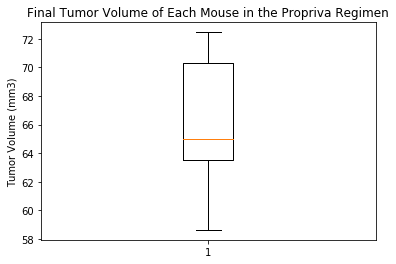

In [20]:
# Generate a box plot of the final tumor volume for the Propriva Regimen
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Each Mouse in the Propriva Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(propriva_max_df["Tumor Volume (mm3)"])
plt.show()

## Line and scatter plots

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#DataFrame for mouse g288
capomulin_df = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "g288"]
capomulin_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
235,g288,Capomulin,Male,3,19,0,45.000000,0
236,g288,Capomulin,Male,3,19,5,45.839400,0
237,g288,Capomulin,Male,3,19,10,46.304003,1
238,g288,Capomulin,Male,3,19,15,42.172301,1
239,g288,Capomulin,Male,3,19,20,42.957120,1
240,g288,Capomulin,Male,3,19,25,42.368692,1
241,g288,Capomulin,Male,3,19,30,42.874461,1
242,g288,Capomulin,Male,3,19,35,38.954115,1
243,g288,Capomulin,Male,3,19,40,36.356851,1
244,g288,Capomulin,Male,3,19,45,37.074024,1


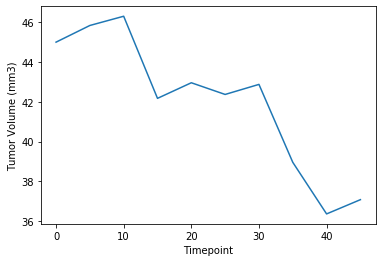

In [22]:
#Line plot of time point versus tumor volume for mouse g288 treated with Capomulin
plt.plot(capomulin_mouse_df["Timepoint"], capomulin_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Mouse tumor volume
mean_capomulin_df = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mean_capomulin_df.head()

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
Name: Tumor Volume (mm3), dtype: float64

In [24]:
#Mouse weight
weight_capomulin_df = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
weight_capomulin_df.head()

Mouse ID
b128    22
b742    21
f966    17
g288    19
g316    22
Name: Weight (g), dtype: int64

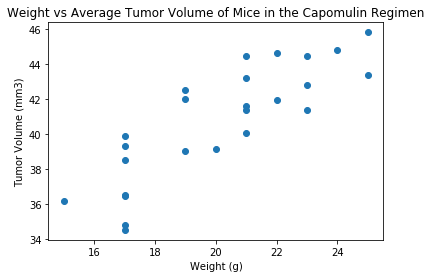

In [25]:
#Scatter plot
plt.scatter(weight_capomulin_df, mean_capomulin_df)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume of Mice in the Capomulin Regimen")
plt.show()

In [26]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
weight_df = capomulin_df.iloc[:,0]
tumor_volume_df = capomulin_df.iloc[:,1]
correlation = st.pearsonr(weight_capomulin_df,mean_capomulin_df)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8419363424694718


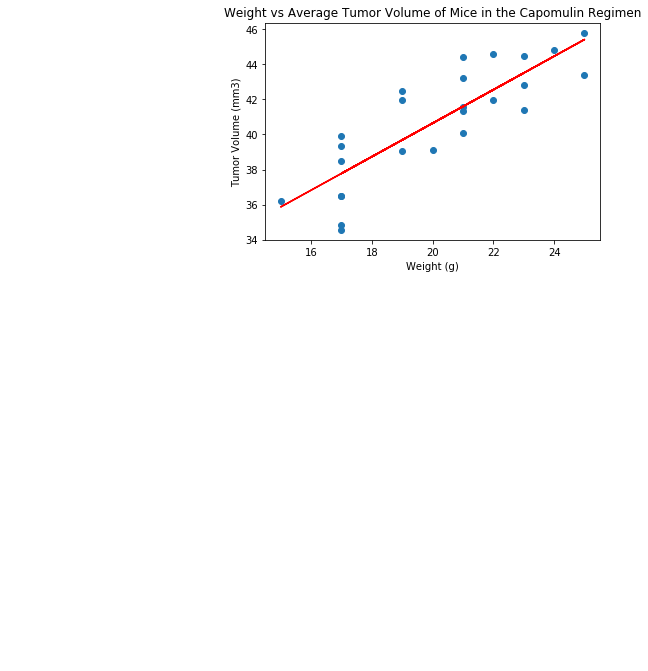

In [35]:
#Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_capomulin_df
y_values = mean_capomulin_df
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume of Mice in the Capomulin Regimen")
print(f"The r-squared is: {rvalue}")
plt.show()